In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr

In [3]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [4]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
# csv file containing air temperature and ground temperatures at varying depths for different sites (measured in july - september 2011)
df = pd.read_csv("raw_datasets/erikson/Groundtemperatu/BTI_2011TimeSeriesData_GroundTemperature.csv")

# csv file containing mean sediment diameters and descriptions of sediment samples at different sites (measured in july 2011)
df_sediment = pd.read_csv("raw_datasets/erikson/Meangrainsizeof/BTI_2011GrainSize_Data.csv")

# Read the Shapefile into a GeoDataFrame
gdf_sl = gpd.read_file('raw_datasets/gibbs/BarterIsland_Shoreline_1947to2020.zip').to_crs(crs="4326")

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude.values, df.Latitude.values), crs=4326)

gdf_sediment = gpd.GeoDataFrame(df_sediment, geometry=gpd.points_from_xy(df_sediment.Longitude.values, df_sediment.Latitude.values), crs=4326)

gdf.head()

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)


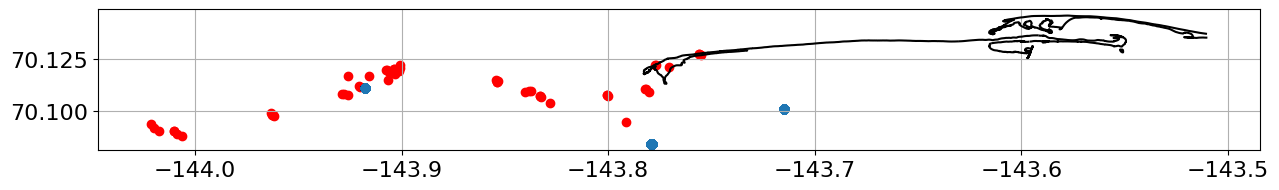

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

gdf_sl[(gdf_sl.Year_ == 2010) + (gdf_sl.Year_ == 2011)].plot(ax=ax, color='k')
gdf_sediment.plot(ax=ax, color='red')
gdf.plot(ax=ax)

ax.grid()

ax.set_aspect('equal')

In [8]:
coords = []

for point in gdf.geometry.values:
    if (point.x, point.y) not in coords:
        coords.append((point.x, point.y))
        
print(coords)

p1 = (-143.77901, 70.08405)  # main land
p2 = (-143.71484, 70.10072)  # main land, but a bit north-eastward
p3 = (-143.91774, 70.11128)  # Arey Island

[(-143.77901, 70.08405), (-143.77921, 70.084111), (-143.77926, 70.08415), (-143.77947, 70.084211), (-143.71484, 70.10072), (-143.91774, 70.11128)]


Assume I only siteID BL01

In [9]:
# px, py = p3

# mask = (gdf.geometry.x == px) * (gdf.geometry.y == py)

mask = (gdf.SiteID == 'BL01')

gdf_masked = gdf[mask]

gdf_masked.describe()

,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm
count,1.940000e+03,1.940000e+03,1940.0,1940.000000,1940.000000,1940.000000,1940.0,0.0,0.0,0.0,0.0,1940.000000,0.0,0.0,1940.000000,1940.000000,1940.000000
mean,-1.437790e+02,7.008405e+01,2011.0,8.029897,16.280928,11.514433,0.0,NaN,NaN,NaN,NaN,-0.059897,NaN,NaN,-1.415258,-3.330103,-4.848918
std,1.506739e-12,2.117963e-12,0.0,0.784805,8.280098,6.923609,0.0,NaN,NaN,NaN,NaN,0.559691,NaN,NaN,0.559907,0.683785,0.700051
min,-1.437790e+02,7.008405e+01,2011.0,7.000000,1.000000,0.000000,0.0,NaN,NaN,NaN,NaN,-1.500000,NaN,NaN,-2.700000,-4.700000,-6.200000
25%,-1.437790e+02,7.008405e+01,2011.0,7.000000,10.000000,6.000000,0.0,NaN,NaN,NaN,NaN,-0.125000,NaN,NaN,-1.700000,-3.900000,-5.400000
50%,-1.437790e+02,7.008405e+01,2011.0,8.000000,16.000000,12.000000,0.0,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,-1.200000,-3.200000,-4.700000
75%,-1.437790e+02,7.008405e+01,2011.0,9.000000,23.000000,18.000000,0.0,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,-1.000000,-2.800000,-4.300000
max,-1.437790e+02,7.008405e+01,2011.0,9.000000,31.000000,23.000000,0.0,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,-0.100000,-0.100000,-0.200000


In [10]:
display(gdf_masked.head())
display(gdf_masked.tail())

,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
0,BL01,HOBO,-143.77901,70.08405,2011,7,8,7,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
1,BL01,HOBO,-143.77901,70.08405,2011,7,8,8,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
2,BL01,HOBO,-143.77901,70.08405,2011,7,8,9,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
3,BL01,HOBO,-143.77901,70.08405,2011,7,8,10,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)
4,BL01,HOBO,-143.77901,70.08405,2011,7,8,11,0,NaN,NaN,NaN,NaN,-1.5,NaN,NaN,-2.7,-4.7,-6.2,POINT (-143.77901 70.08405)


,SiteID,Instrument,Longitude,Latitude,year,month,day,hour,minute,Tair,T10cm,T15cm,T30cm,T50cm,T60cm,T90cm,T100cm,T200cm,T295cm,geometry
1935,BL01,HOBO,-143.77901,70.08405,2011,9,26,22,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1936,BL01,HOBO,-143.77901,70.08405,2011,9,26,23,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1937,BL01,HOBO,-143.77901,70.08405,2011,9,27,0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1938,BL01,HOBO,-143.77901,70.08405,2011,9,27,1,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)
1939,BL01,HOBO,-143.77901,70.08405,2011,9,27,2,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-0.9,-2.5,-4.0,POINT (-143.77901 70.08405)


* p1 only has values for T50, T100, T200, T295
* p2 only has values for Tair and T15.
* p3 only has values for Tair, T10, T30, T50

Regarding completeness of the data, this might make p1 the most suitable, even though it's on Arey Island, which is a bit out of the way. All data was collected between 8-7-2011 and 26-9-2011.

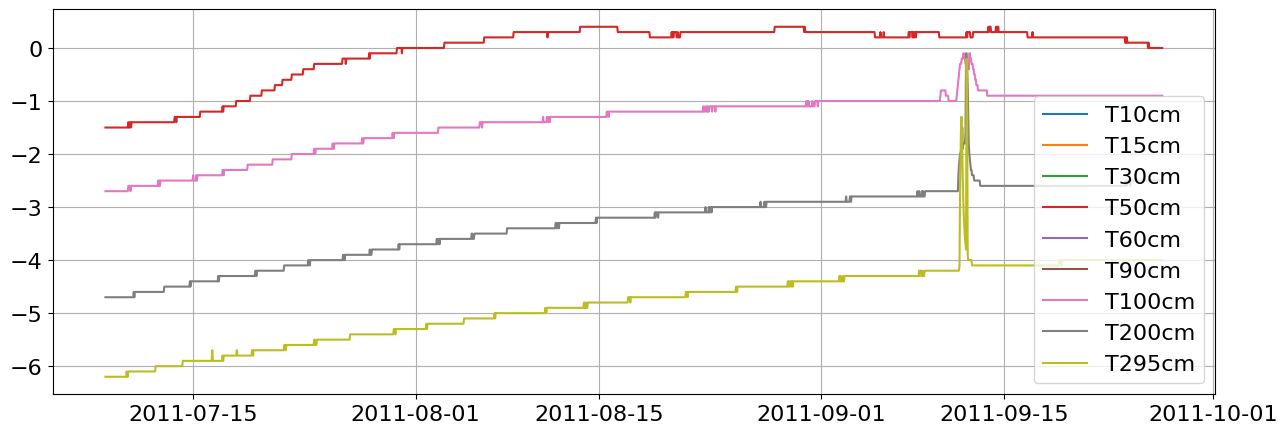

In [11]:
timestamps = pd.to_datetime(gdf_masked[["year", "month", "day", "hour", "minute"]])
T10 = gdf_masked.T10cm.values
T15 = gdf_masked.T15cm.values
T30 = gdf_masked.T30cm.values
T50 = gdf_masked.T50cm.values
T60 = gdf_masked.T60cm.values
T90 = gdf_masked.T90cm.values
T100 = gdf_masked.T100cm.values
T200 = gdf_masked.T200cm.values
T295 = gdf_masked.T295cm.values

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(timestamps, T10, label='T10cm')
ax.plot(timestamps, T15, label='T15cm')
ax.plot(timestamps, T30, label='T30cm')
ax.plot(timestamps, T50, label='T50cm')
ax.plot(timestamps, T60, label='T60cm')
ax.plot(timestamps, T90, label='T90cm')
ax.plot(timestamps, T100, label='T100cm')
ax.plot(timestamps, T200, label='T200cm')
ax.plot(timestamps, T295, label='T295cm')

ax.legend()
ax.grid()


This data should be compared with the Era5 data (which I don't have yet for the correct year).

In [12]:
# load in era5 data
era5 = pd.read_csv(os.path.join(os.getcwd(), Path("ts_datasets/era5.csv")), parse_dates=['time'])

YEAR = 2011
MIN_MONTH = 1
MAX_MONTH = 12

# mask out correct values
timestamps_era5 = pd.to_datetime(era5.time.values)
mask = (timestamps_era5.month >= MIN_MONTH) * (timestamps_era5.month <= MAX_MONTH) * (timestamps_era5.year == YEAR)
era5_masked = era5[mask]

# # timestamps used for plotting
# t_start = pd.to_datetime("07-01-2011")
# t_end = pd.to_datetime("10-01-2011")

# timestamps_era5_plot = pd.date_range(start=t_start, end=t_end, freq='1h', inclusive='left')

timestamps_era5_plot = era5_masked.time.values

# get arrays of values
T035_era5 = era5_masked.soil_temperature_level_1.values - 273.15
T18_era5 = era5_masked.soil_temperature_level_2.values - 273.15
T64_era5 = era5_masked.soil_temperature_level_3.values - 273.15
T195_era5 = era5_masked.soil_temperature_level_4.values - 273.15

print(len(era5_masked.soil_temperature_level_1.values))
print(len(timestamps_era5_plot))

8760
8760


Text(0.5, 0.98, 'ground temperature (era5 & Erikson)')

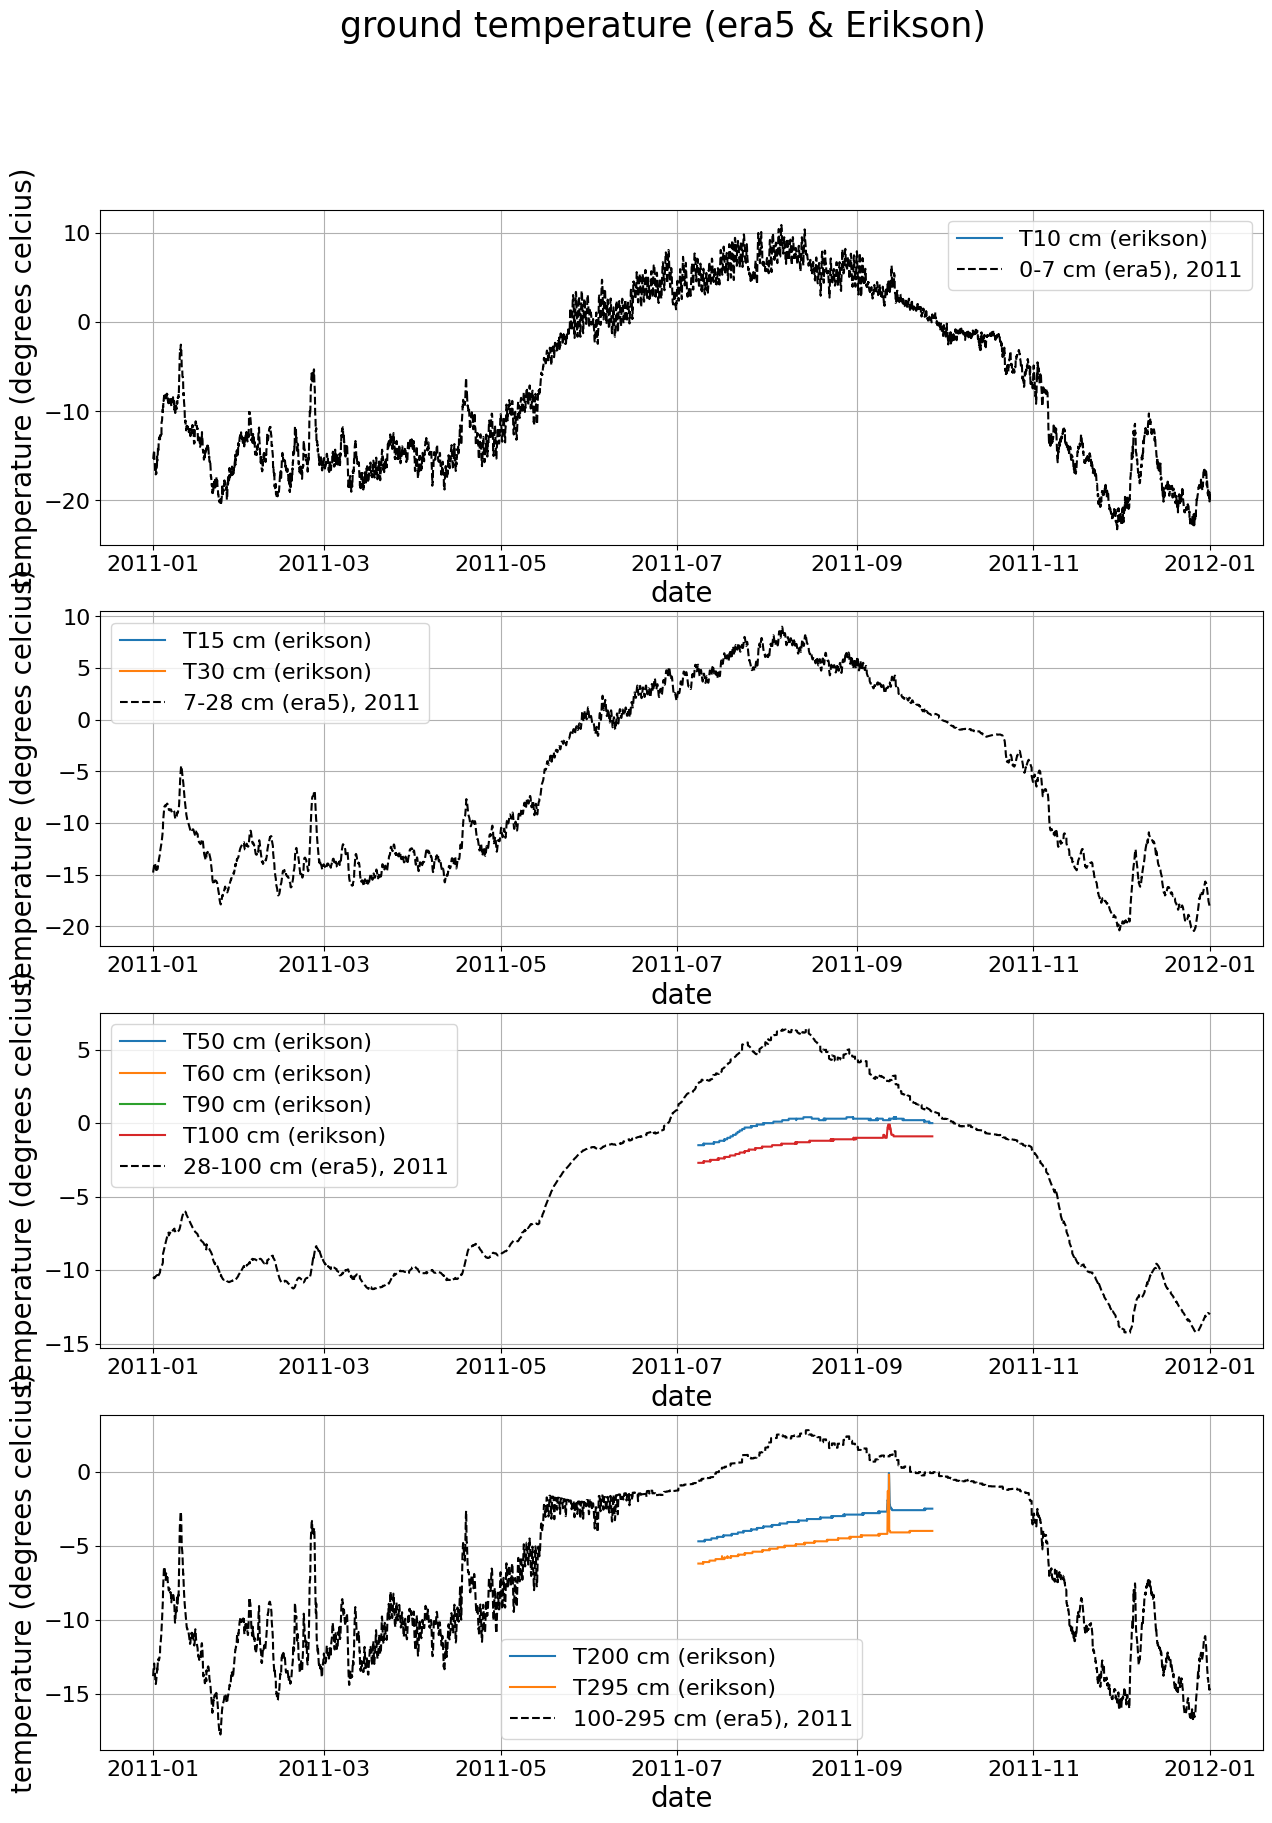

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(15,20))

axs[0].plot(timestamps, T10, label='T10 cm (erikson)')
axs[1].plot(timestamps, T15, label='T15 cm (erikson)')
axs[1].plot(timestamps, T30, label='T30 cm (erikson)')
axs[2].plot(timestamps, T50, label='T50 cm (erikson)')
axs[2].plot(timestamps, T60, label='T60 cm (erikson)')
axs[2].plot(timestamps, T90, label='T90 cm (erikson)')
axs[2].plot(timestamps, T100, label='T100 cm (erikson)')
axs[3].plot(timestamps, T200, label='T200 cm (erikson)')
axs[3].plot(timestamps, T295, label='T295 cm (erikson)')

axs[0].plot(timestamps_era5_plot, T035_era5, label='0-7 cm (era5), 2011', ls='--', color='k')
axs[1].plot(timestamps_era5_plot, T18_era5, label='7-28 cm (era5), 2011', ls='--', color='k')
axs[2].plot(timestamps_era5_plot, T64_era5, label='28-100 cm (era5), 2011', ls='--', color='k')
axs[3].plot(timestamps_era5_plot, T195_era5, label='100-295 cm (era5), 2011', ls='--', color='k')

for ax in axs:
    ax.set_xlabel("date")
    ax.set_ylabel("temperature (degrees celcius)")
    ax.legend()

    ax.grid()
    
fig.suptitle("ground temperature (era5 & Erikson)")

Results for different points:
- p1 is about 6 degrees too low and has not that good data availability
- p2 is about 2.5 degrees to high and has bad data availability
- p3 shows reasonable resemblance and has good data availability.

In general, Erikson's ground temperature data is much less peaky.

Let's compare at different levels, and make a x=y scatter plot.

In [14]:
t_start = np.min(timestamps)
t_end = np.max(timestamps)

print(t_start)
print(t_end)

2011-07-08 07:00:00
2011-09-27 02:00:00


In [15]:
mask = (timestamps_era5_plot >= t_start) & (timestamps_era5_plot <= t_end)

df = pd.DataFrame(
    {
        'time': timestamps_era5_plot[mask],
        'T035_era5(C)': T035_era5[mask],
        'T18_era5(C)': T18_era5[mask],
        'T64_era5(C)': T64_era5[mask],
        'T195_era5(C)': T195_era5[mask],
        'T50_erikson(C)': T50,
        'T100_erikson(C)': T100,
        'T200_erikson(C)': T200,
        'T295_erikson(C)': T295,
    }
)

df.head()

,time,T035_era5(C),T18_era5(C),T64_era5(C),T195_era5(C),T50_erikson(C),T100_erikson(C),T200_erikson(C),T295_erikson(C)
0,2011-07-08 07:00:00,5.727669,5.205699,2.707848,-0.639624,-1.5,-2.7,-4.7,-6.2
1,2011-07-08 08:00:00,5.579360,5.106954,2.714463,-0.639624,-1.5,-2.7,-4.7,-6.2
2,2011-07-08 09:00:00,4.719512,4.989009,2.724163,-0.637093,-1.5,-2.7,-4.7,-6.2
3,2011-07-08 10:00:00,4.506907,4.963638,2.753706,-0.615572,-1.5,-2.7,-4.7,-6.2
4,2011-07-08 11:00:00,4.235151,4.837464,2.758997,-0.615572,-1.5,-2.7,-4.7,-6.2


Text(0, 0.5, 'modelled temperature era5 (C)')

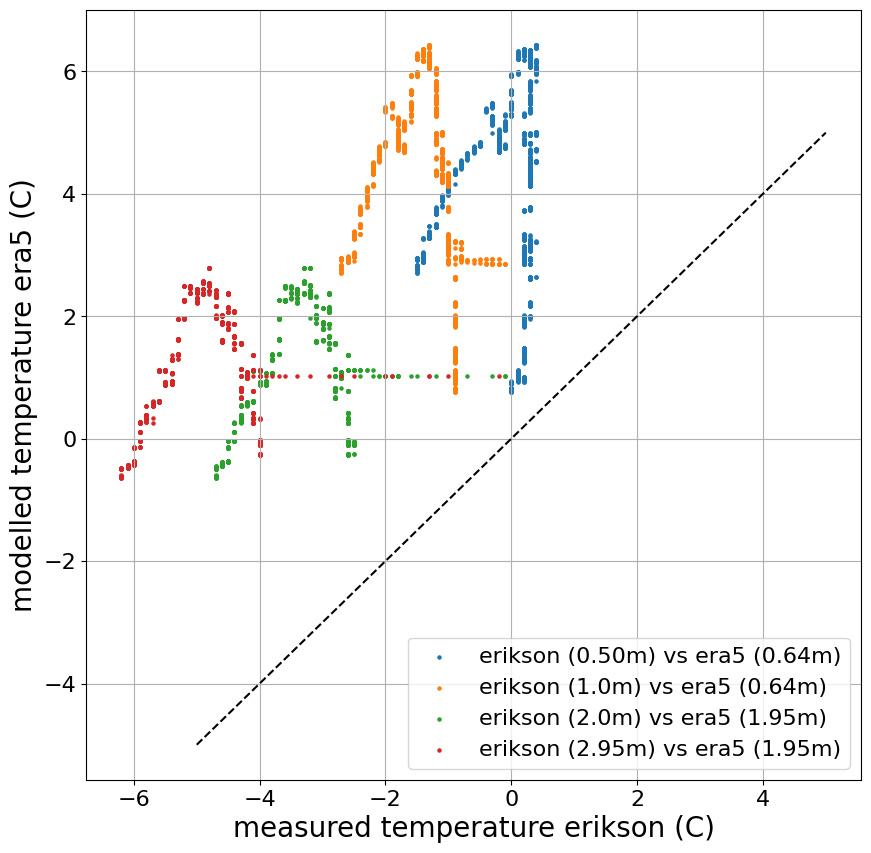

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot([-5, 5], [-5, 5], 'k--')

ax.scatter(df['T50_erikson(C)'], df['T64_era5(C)'], label='erikson (0.50m) vs era5 (0.64m)', color='C0', s=5) # alpha=(0.1 + 0.8 * df.index / len(df)))
ax.scatter(df['T100_erikson(C)'], df['T64_era5(C)'], label='erikson (1.0m) vs era5 (0.64m)', color='C1', s=5)
ax.scatter(df['T200_erikson(C)'], df['T195_era5(C)'], label='erikson (2.0m) vs era5 (1.95m)', color='C2', s=5)
ax.scatter(df['T295_erikson(C)'], df['T195_era5(C)'], label='erikson (2.95m) vs era5 (1.95m)', color='C3', s=5)

ax.legend(loc='lower right')
ax.grid()
ax.set_xlabel('measured temperature erikson (C)')
ax.set_ylabel('modelled temperature era5 (C)')

I guess we can use BLUE here?

In [17]:
# Let's start with the depth of 0.50m, and assume T_erikson = T1 * x1 + T2 * x2 + T3 * x3 + T4 * x4 + x5

# Sigma = np.zeros((4,4))
# Sigma[0,0] = df['T035_era5(C)'].var()
# Sigma[1,1] = df['T18_era5(C)'].var()
# Sigma[2,2] = df['T64_era5(C)'].var()
# Sigma[3,3] = df['T195_era5(C)'].var()

# print(Sigma)

# sigma_inv = np.linalg.inv(Sigma)

Sigma_050_inv = np.var(df['T50_erikson(C)'].values)**-1
Sigma_100_inv = np.var(df['T100_erikson(C)'].values)**-1
Sigma_200_inv = np.var(df['T200_erikson(C)'].values)**-1
Sigma_295_inv = np.var(df['T295_erikson(C)'].values)**-1

# y = A @ X

A = np.column_stack([df[['T035_era5(C)', 'T18_era5(C)', 'T64_era5(C)', 'T195_era5(C)']], np.ones((len(df), 1))])

print(A.shape)

X_hat_050 = np.linalg.inv(A.T * Sigma_050_inv @ A) @ A.T * Sigma_050_inv @ df['T50_erikson(C)'].values
X_hat_100 = np.linalg.inv(A.T * Sigma_100_inv @ A) @ A.T * Sigma_100_inv @ df['T100_erikson(C)'].values
X_hat_200 = np.linalg.inv(A.T * Sigma_200_inv @ A) @ A.T * Sigma_200_inv @ df['T200_erikson(C)'].values
X_hat_295 = np.linalg.inv(A.T * Sigma_295_inv @ A) @ A.T * Sigma_295_inv @ df['T295_erikson(C)'].values


Y_hat_050 = A @ X_hat_050
Y_hat_100 = A @ X_hat_100
Y_hat_200 = A @ X_hat_200
Y_hat_295 = A @ X_hat_295

(1940, 5)


Let's plot that again

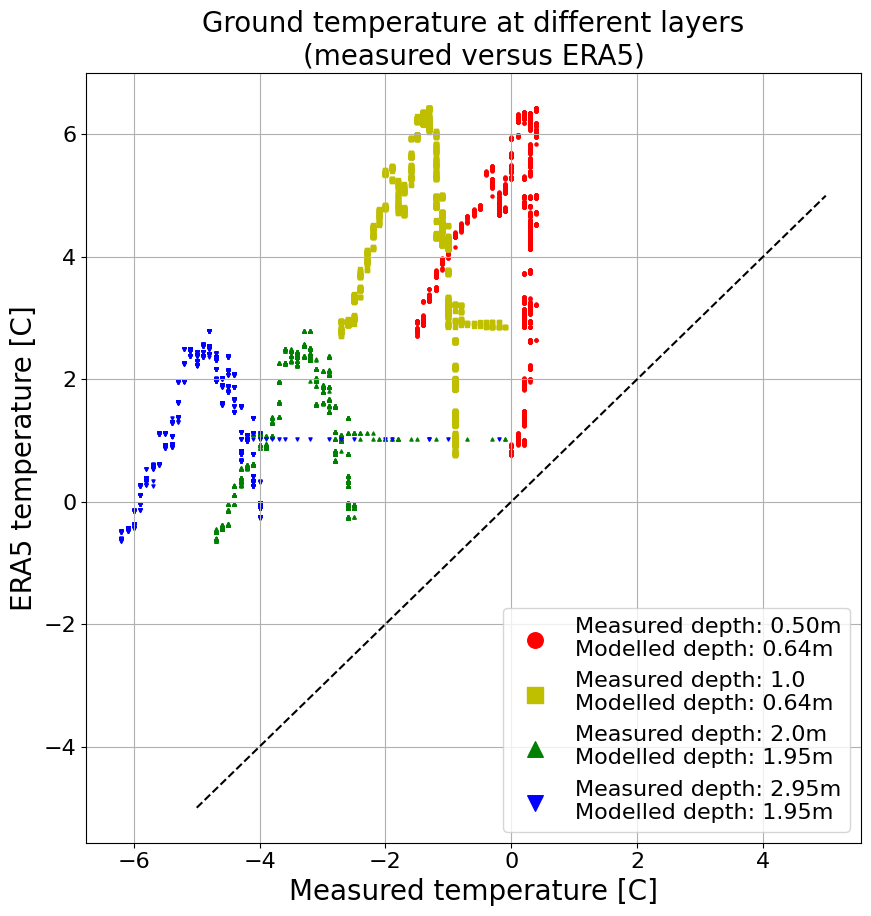

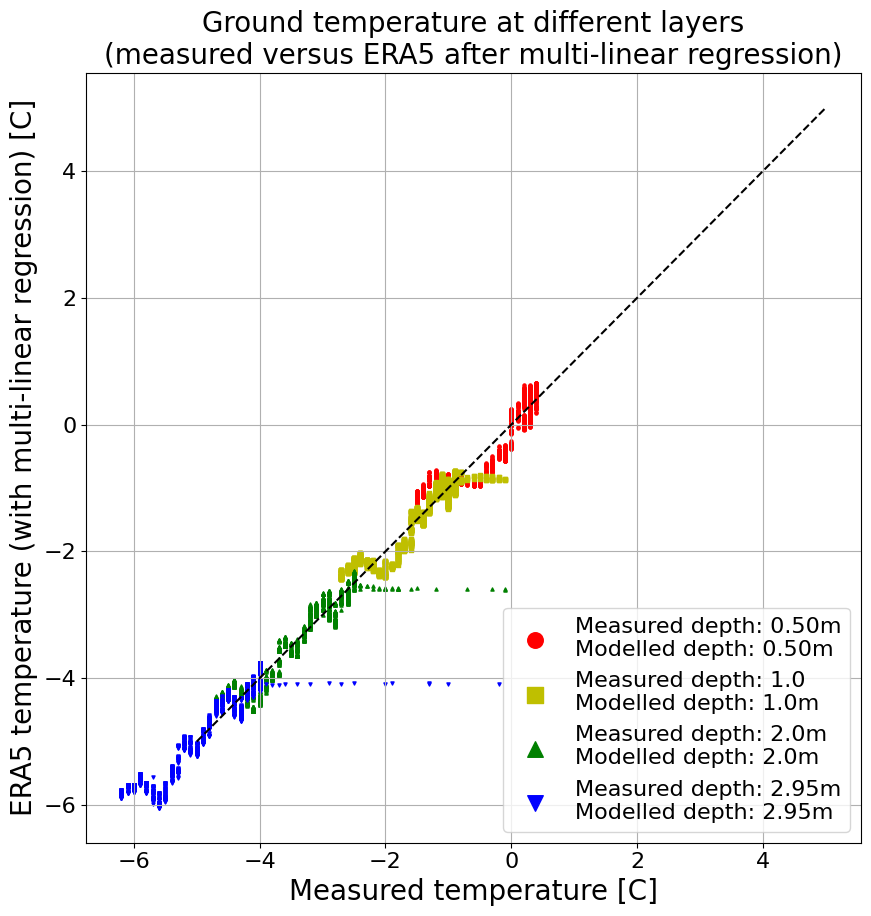

In [30]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
fig2, ax2 = plt.subplots(figsize=(10, 10))

ax1.plot([-5, 5], [-5, 5], 'k--')
ax2.plot([-5, 5], [-5, 5], 'k--')

ax1.scatter(df['T50_erikson(C)'], df['T64_era5(C)'], label='Measured depth: 0.50m\nModelled depth: 0.64m', color='r', s=5) # alpha=(0.1 + 0.8 * df.index / len(df)))
ax1.scatter(df['T100_erikson(C)'], df['T64_era5(C)'], label='Measured depth: 1.0\nModelled depth: 0.64m', color='y', s=5, marker='s')
ax1.scatter(df['T200_erikson(C)'], df['T195_era5(C)'], label='Measured depth: 2.0m\nModelled depth: 1.95m', color='g', s=5, marker='^')
ax1.scatter(df['T295_erikson(C)'], df['T195_era5(C)'], label='Measured depth: 2.95m\nModelled depth: 1.95m', color='b', s=5, marker='v')

ax2.scatter(df['T50_erikson(C)'], Y_hat_050, label='Measured depth: 0.50m\nModelled depth: 0.50m', color='r', s=5)
ax2.scatter(df['T100_erikson(C)'], Y_hat_100, label='Measured depth: 1.0\nModelled depth: 1.0m', color='y', s=5, marker='s')
ax2.scatter(df['T200_erikson(C)'], Y_hat_200, label='Measured depth: 2.0m\nModelled depth: 2.0m', color='g', s=5, marker='^')
ax2.scatter(df['T295_erikson(C)'], Y_hat_295, label='Measured depth: 2.95m\nModelled depth: 2.95m', color='b', s=5, marker='v')

for ax in [ax1, ax2]:
    ax.legend(loc='lower right', markerscale=5)
    ax.grid()
    
ax1.set_xlabel('Measured temperature [C]')
ax1.set_ylabel('ERA5 temperature [C]')

ax2.set_xlabel('Measured temperature [C]')
ax2.set_ylabel('ERA5 temperature (with multi-linear regression) [C]')

ax1.set_title('Ground temperature at different layers\n(measured versus ERA5)')
ax2.set_title('Ground temperature at different layers\n(measured versus ERA5 after multi-linear regression)')

fig1.savefig(os.path.join(save_path, "erikson_vs_era5.png"), bbox_inches='tight', facecolor='white', transparent=False)
fig2.savefig(os.path.join(save_path, "erikson_vs_era5_BLUE.png"), bbox_inches='tight', facecolor='white', transparent=False)


That actually looks pretty great. I guess we can use X_hat to modify the era5 points used for the initial conditions in the model.

In [19]:
print("X_hat_050: ", X_hat_050)
print("X_hat_100: ", X_hat_100)
print("X_hat_200: ", X_hat_200)
print("X_hat_295: ", X_hat_295)

X_hat_050:  [-0.02163062 -0.08608815 -0.24727198  0.85767179  0.50312175]
X_hat_100:  [-0.01413212 -0.06174901 -0.43995551  0.90051021 -0.27118645]
X_hat_200:  [-0.01307938 -0.04550354 -0.63351549  1.08458661 -1.69197484]
X_hat_295:  [-0.01653768 -0.04655887 -0.64069442  1.06113026 -3.12932172]


In [20]:
X_hat_all = np.column_stack([X_hat_050, X_hat_100, X_hat_200, X_hat_295]).T

print(X_hat_all)

np.savetxt("ts_datasets/X_hat_groundtemp_reconstruct.txt", X_hat_all)

[[-0.02163062 -0.08608815 -0.24727198  0.85767179  0.50312175]
 [-0.01413212 -0.06174901 -0.43995551  0.90051021 -0.27118645]
 [-0.01307938 -0.04550354 -0.63351549  1.08458661 -1.69197484]
 [-0.01653768 -0.04655887 -0.64069442  1.06113026 -3.12932172]]
